# Why the Gaussian distribution? Because we assume that the continuous values associated with each class are distributed according to the Gaussian distribution.  

In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
gender_df=pd.read_csv("D:/python odyssey/Day7/Naive Bayes/continuos/weight-height.csv")

In [19]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [20]:
gender_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [21]:
gender_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [26]:
gender_df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [58]:
gender_df.groupby(["Gender"])["Height"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,5000.0,63.708774,2.696284,54.263133,61.894441,63.730924,65.563565,73.389586
Male,5000.0,69.026346,2.863362,58.406905,67.174679,69.027709,70.988744,78.998742


In [22]:
male=gender_df[gender_df["Gender"]=="Male"]
female=gender_df[gender_df["Gender"]=="Female"]

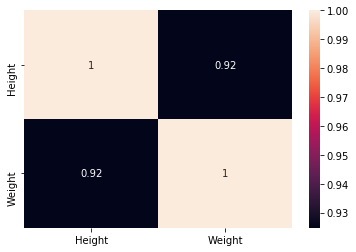

In [28]:
#see if there is any correlation
corr=gender_df.corr()
sns.heatmap(data=corr,annot=True)

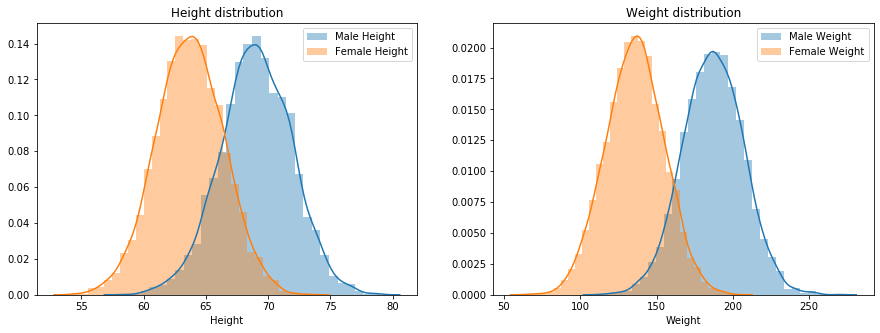

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax=sns.distplot(male["Height"],bins=30,ax=axes[0],label="Male Height")
ax=sns.distplot(female["Height"],bins=30,ax=axes[0],label="Female Height")
ax.set_title("Height distribution")
ax.legend()
ax=sns.distplot(male["Weight"],bins=30,ax=axes[1],label="Male Weight")
ax=sns.distplot(female["Weight"],bins=30,ax=axes[1],label="Female Weight")
ax.set_title("Weight distribution")
ax.legend()


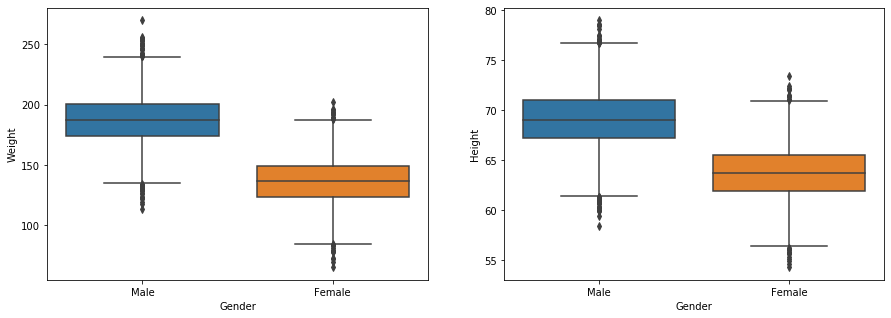

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax=sns.boxplot(x="Gender",y="Weight",data=gender_df,ax=axes[0])
ax=sns.boxplot(x="Gender",y="Height",data=gender_df,ax=axes[1])

In [64]:
X=gender_df.drop(["Gender"],axis=1)
Y=gender_df["Gender"]

In [67]:
print(X.shape)
print(Y.shape)

(10000, 2)
(10000,)


In [59]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model=gnb_model.fit(X_train,y_train)
y_pred=gnb_model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test, y_pred)

0.887

In [73]:
confusion_matrix(y_test, y_pred)

array([[1287,  176],
       [ 163, 1374]], dtype=int64)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.89      0.88      0.88      1463
        Male       0.89      0.89      0.89      1537

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000

